# New Year Sales Data Analysis Project

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df= pd.read_csv('New_Year_Sales_Data.csv', encoding='latin1')

In [19]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [35]:
df.shape

(11251, 15)

In [41]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

# Data Cleaning

In [21]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [88]:
df.sum()

User_ID                                                   11272756581
Product_ID          P00125942P00110942P00118542P00237842P00057942P...
Gender              FFFMMMFMFMFFMFFMMFFFFMFFFMFFFFFFMMFMFMMMFFMFMF...
Age Group           26-3526-3526-350-1726-3526-3518-2526-3526-3526...
Age                                                            397977
Marital_Status                                                   4721
State               MaharashtraAndhra PradeshUttar PradeshKarnatak...
Zone                WesternSouthernCentralSouthernWesternNorthernC...
Occupation          HealthcareGovtAutomobileConstructionFood Proce...
Product_Category    AutoAutoAutoAutoAutoAutoAutoAutoAutoAutoAutoAu...
Orders                                                          27981
Amount                                                      106249129
dtype: object

In [33]:
# df[['Status','unnamed1']].apply(lambda col: col.unique())

,Status,unnamed1
0,NaN,NaN


In [45]:
df.drop(['Cust_name','Status','unnamed1'],axis=1,inplace= True)

In [47]:
df.dropna(inplace=True)
# df.dropna(subset=['Amount'],inplace= True)

In [49]:
df.isnull().sum()

User_ID             0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [51]:
df.shape

(11239, 12)

In [53]:
df['Amount']= df['Amount'].astype(int)

In [55]:
df.dtypes

User_ID              int64
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

# Data Overview and Summary

In [59]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [61]:
df.describe(include='object')

,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11239,11239,11239,11239,11239,11239,11239
unique,2350,2,7,16,5,15,18
top,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,53,7832,4541,1944,4289,1583,2655


In [65]:
df.nunique()

User_ID             3752
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

In [71]:
df[['Gender','State','Zone','Occupation','Product_Category']].apply(lambda col: col.unique())

Gender                                                         [F, M]
State               [Maharashtra, Andhra Pradesh, Uttar Pradesh, K...
Zone                  [Western, Southern, Central, Northern, Eastern]
Occupation          [Healthcare, Govt, Automobile, Construction, F...
Product_Category    [Auto, Hand & Power Tools, Stationery, Tupperw...
dtype: object

In [73]:
df.State.unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

# Exploratory Data Analysis(EDA)

In [78]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Which gender has a higher purchasing power?

Text(0.5, 1.0, 'Gender Count')

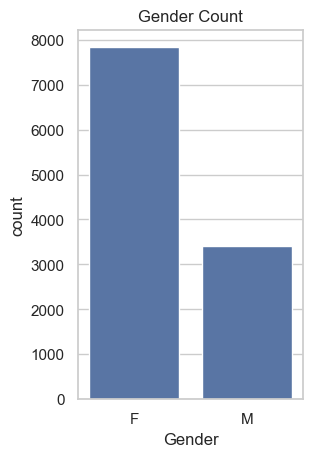

In [84]:
##1. Gender Anlysis

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender')
plt.title("Gender Count")


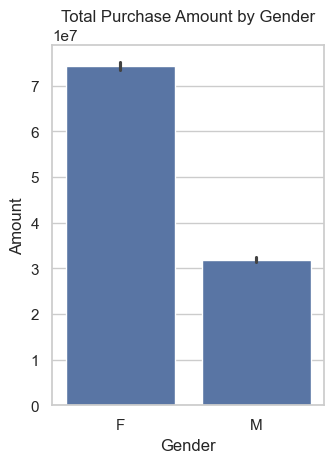

In [92]:
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Gender', y='Amount',estimator=sum)
plt.title("Total Purchase Amount by Gender")
plt.tight_layout()
plt.show()

In [ ]:
# Which age group has the most purchases, and is there a trend in purchasing 
# power by age? 

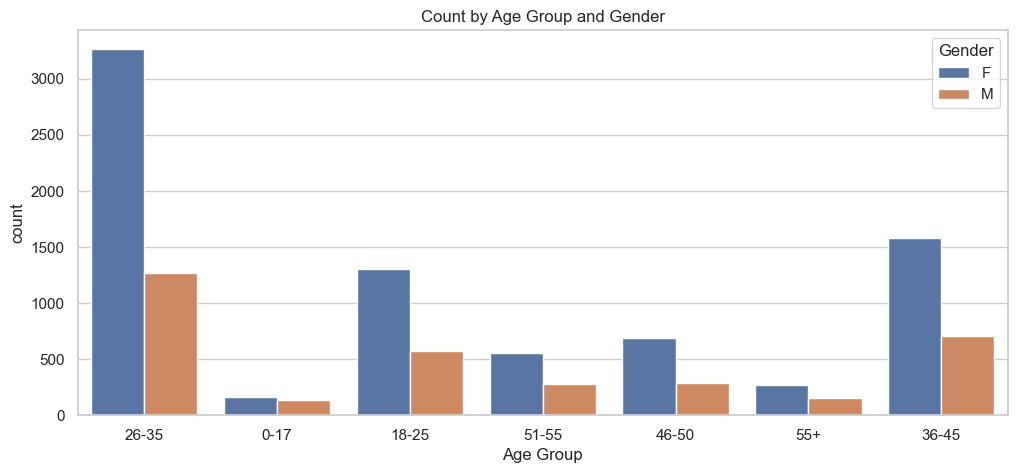

In [94]:
##2  Age Group Analysis

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title("Count by Age Group and Gender")
plt.show()

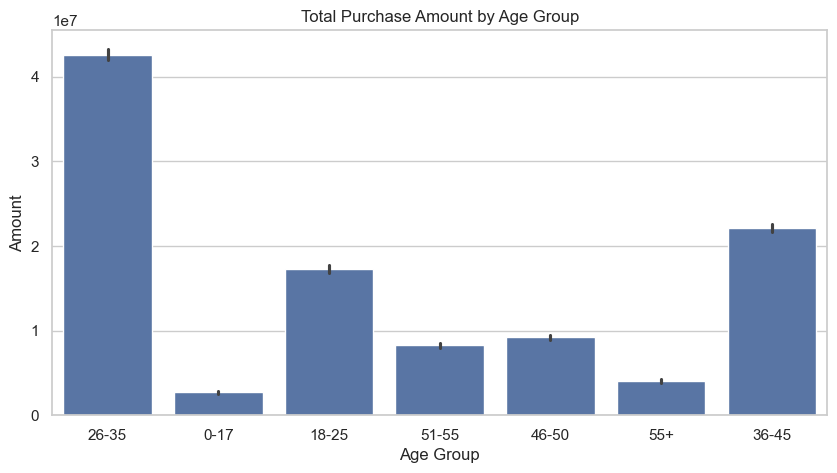

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Age Group', y='Amount', estimator=sum)
plt.title("Total Purchase Amount by Age Group")
plt.show()

In [ ]:
#: Which states generate the highest number of orders and revenue?

In [108]:
# 3. State Analysis
top_states_orders = df['State'].value_counts().head(10)
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states_amount

State
Uttar Pradesh       19374968
Maharashtra         14427543
Karnataka           13523540
Delhi               11603818
Madhya Pradesh       8101142
Andhra Pradesh       8037146
Himachal Pradesh     4963368
Haryana              4220175
Bihar                4022757
Gujarat              3946082
Name: Amount, dtype: int32

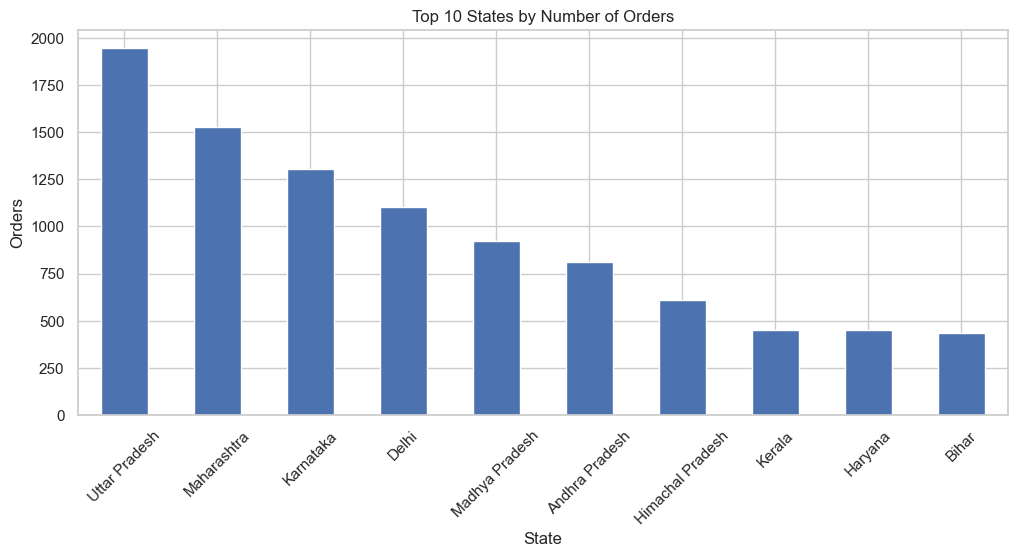

In [100]:
plt.figure(figsize=(12, 5))
top_states_orders.plot(kind='bar')
plt.title("Top 10 States by Number of Orders")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.show()

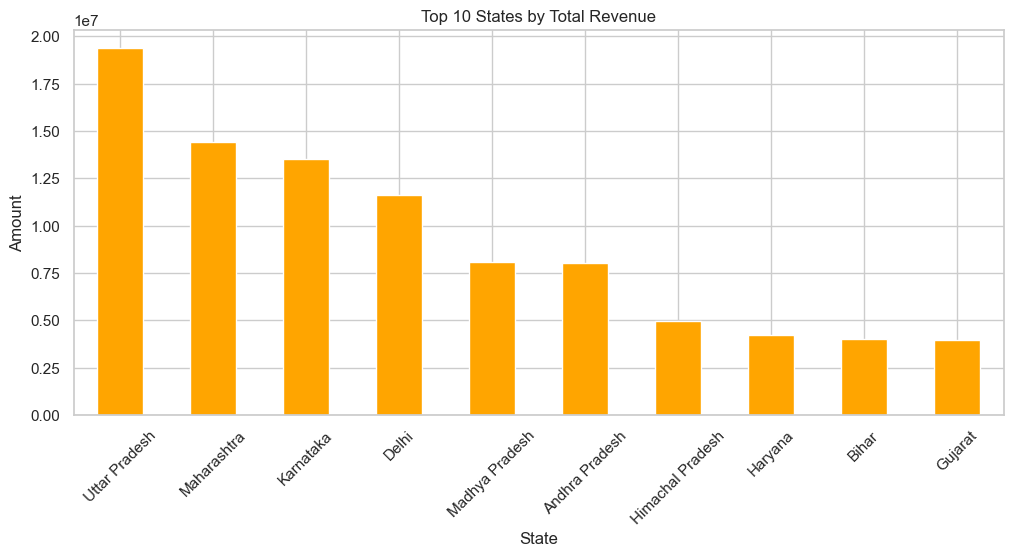

In [104]:
plt.figure(figsize=(12, 5))
top_states_amount.plot(kind='bar', color='orange')
plt.title("Top 10 States by Total Revenue")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#How does marital status affect purchasing behavior?

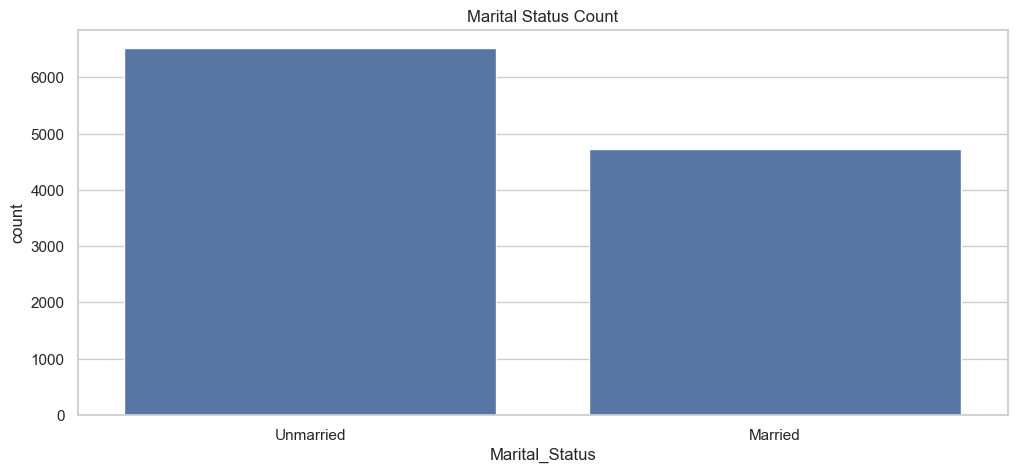

In [110]:
## 4. Marital Status Analysis
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Marital_Status')
plt.title("Marital Status Count")
plt.xticks([0,1], ['Unmarried', 'Married'])
plt.show()


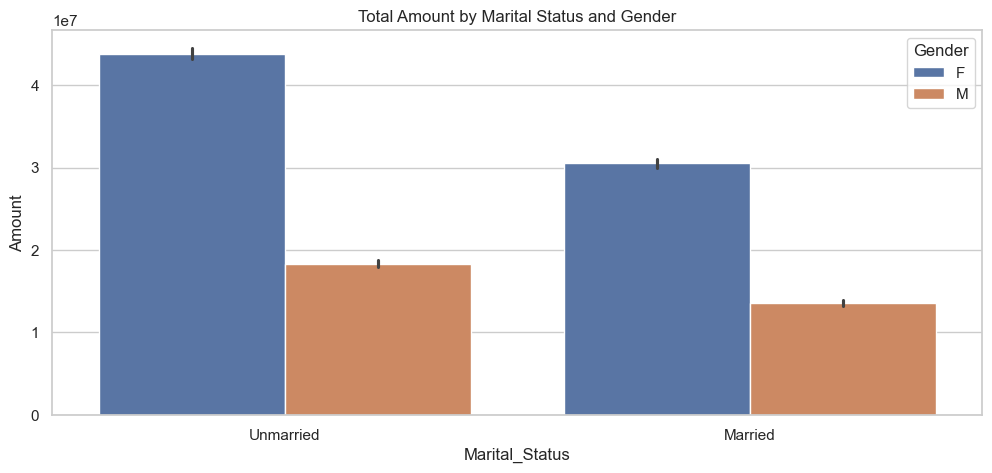

In [114]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Marital_Status', y='Amount', hue='Gender', estimator=sum)
plt.title("Total Amount by Marital Status and Gender")
plt.xticks([0,1], ['Unmarried', 'Married'])
plt.show()

In [ ]:
#: Which occupations contribute most to sales? 

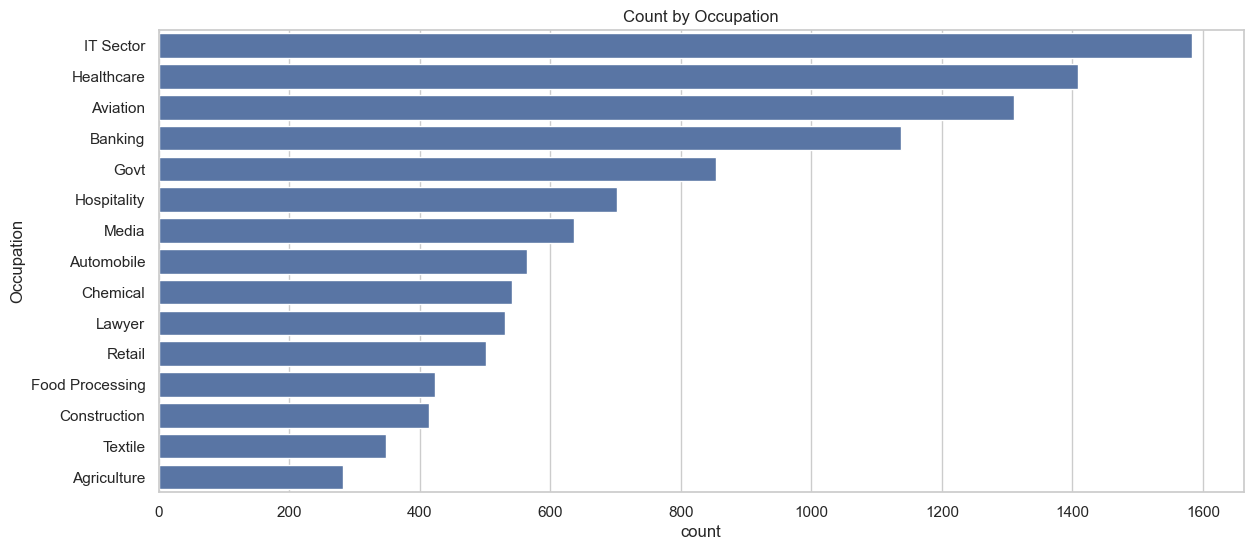

In [128]:
# 5 . Occupation Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index)
plt.title("Count by Occupation")
plt.show()


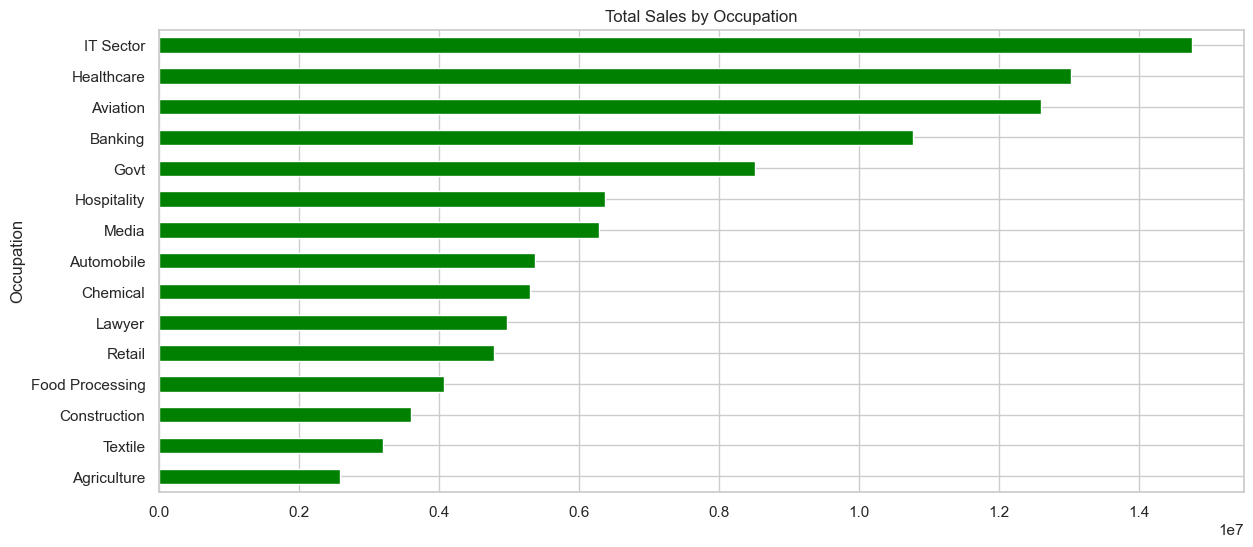

In [130]:
plt.figure(figsize=(14, 6))
occupation_sales = df.groupby('Occupation')['Amount'].sum().sort_values()
occupation_sales.plot(kind='barh', color='green')
plt.title("Total Sales by Occupation")
plt.show()

In [ ]:
# What product categories are the most popular, and which ones generate the 
# most revenue? 

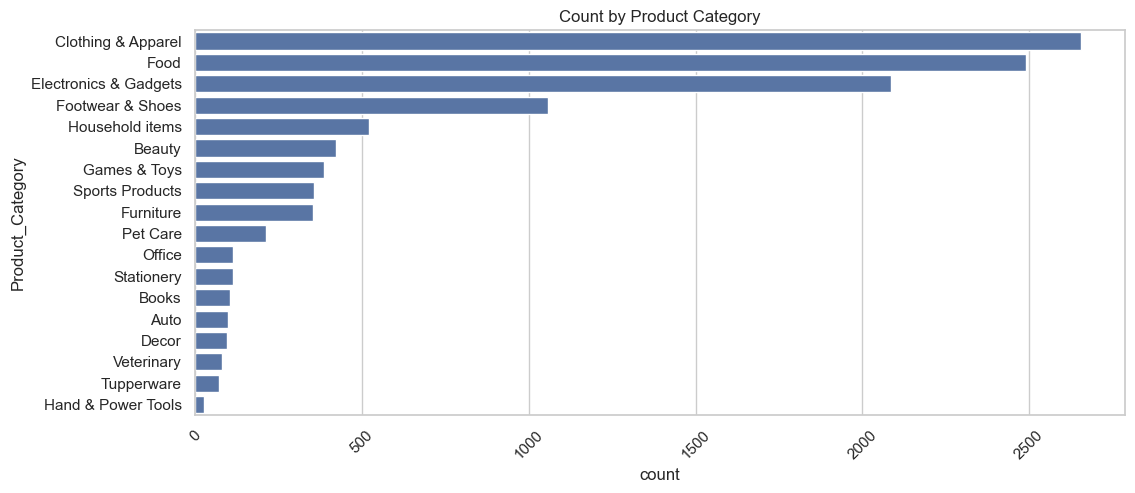

In [146]:
# 6. Product Category Analysis
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title("Count by Product Category")
plt.xticks(rotation=45)
plt.show()

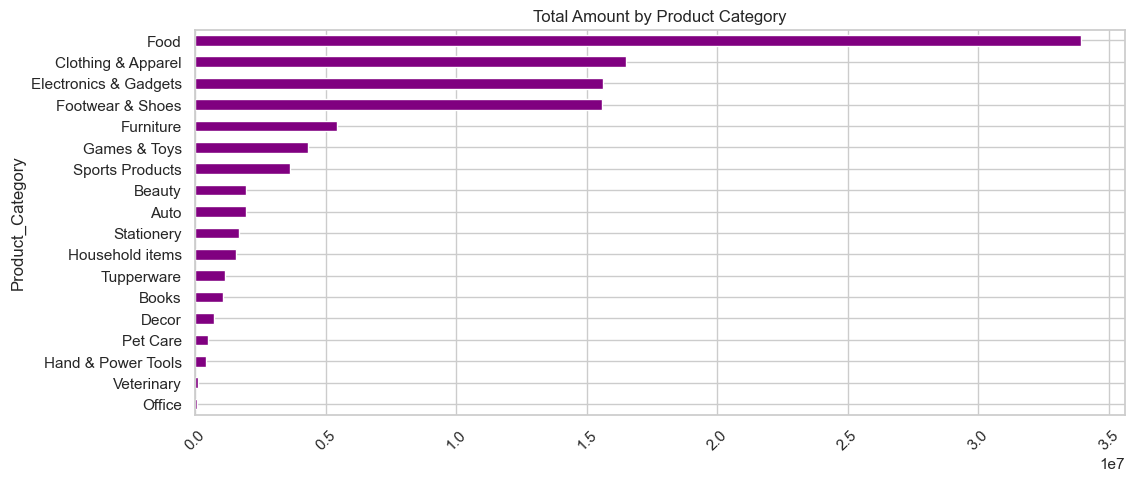

In [148]:
plt.figure(figsize=(12, 5))
category_amount = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=True)
category_amount.plot(kind='barh', color='purple')
plt.title("Total Amount by Product Category")
plt.xticks(rotation=45)
plt.show()

In [151]:
#Which age group contributes the most to each product category, and does this vary by 
# gender? 

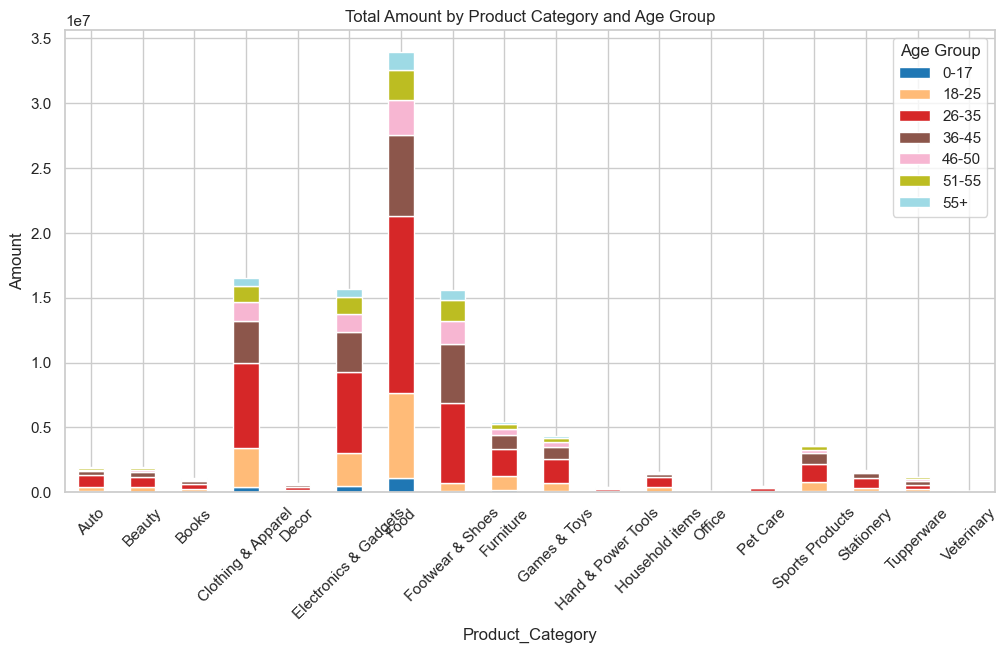

In [153]:
# Total amount by Age Group and Product Category
age_product = df.groupby(['Product_Category', 'Age Group'])['Amount'].sum().unstack().fillna(0)
age_product.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Total Amount by Product Category and Age Group')
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

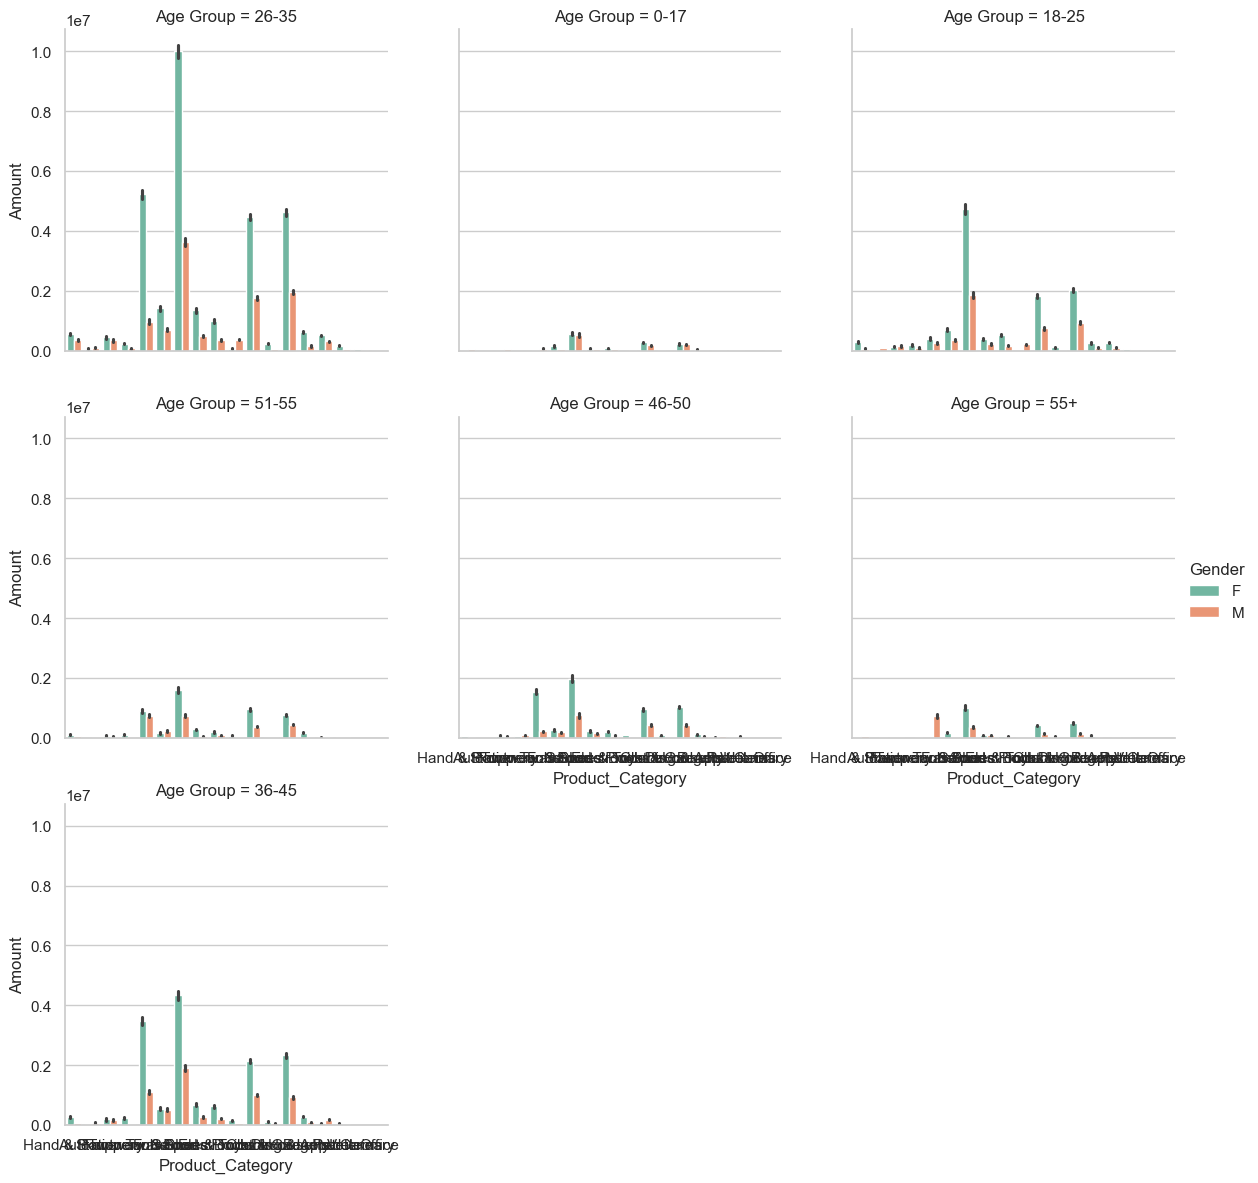

In [155]:
# With gender
sns.catplot(data=df, x='Product_Category', y='Amount', hue='Gender', col='Age Group',
            kind='bar', height=4, col_wrap=3, estimator=sum, palette='Set2')

In [157]:
#How does the amount spent vary by marital status across different age groups? 

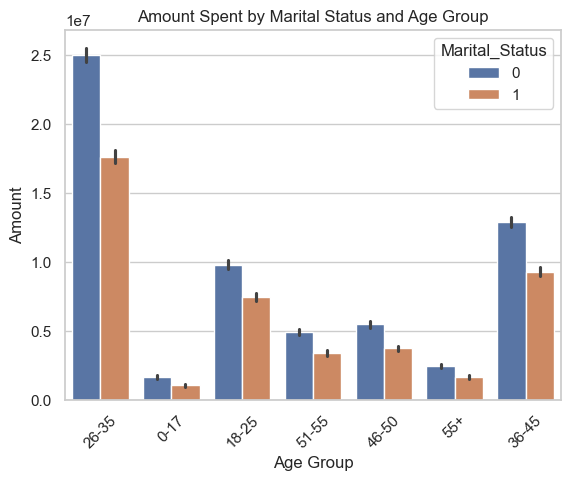

In [159]:
sns.barplot(data=df, x='Age Group', y='Amount', hue='Marital_Status', estimator=sum)
plt.title("Amount Spent by Marital Status and Age Group")
plt.xticks(rotation=45)
plt.show()

In [161]:
#Are there specific occupations that prefer particular product categories more than 
# others?


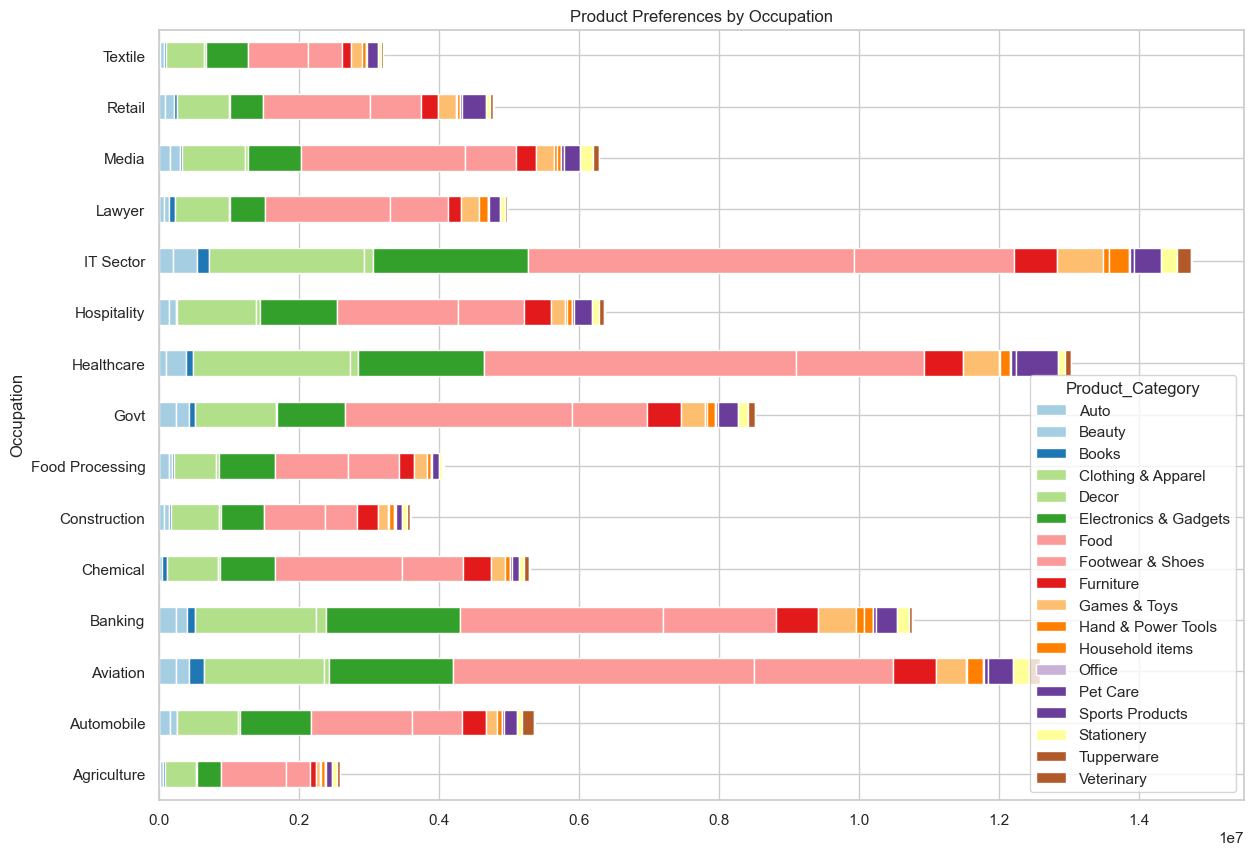

In [163]:
occupation_category = df.groupby(['Occupation', 'Product_Category'])['Amount'].sum().unstack().fillna(0)
occupation_category.plot(kind='barh', stacked=True, figsize=(14,10), colormap='Paired')
plt.title("Product Preferences by Occupation")
plt.show()


In [165]:
# What is the correlation between age and spending amount, and does this differ by 
# gender? 

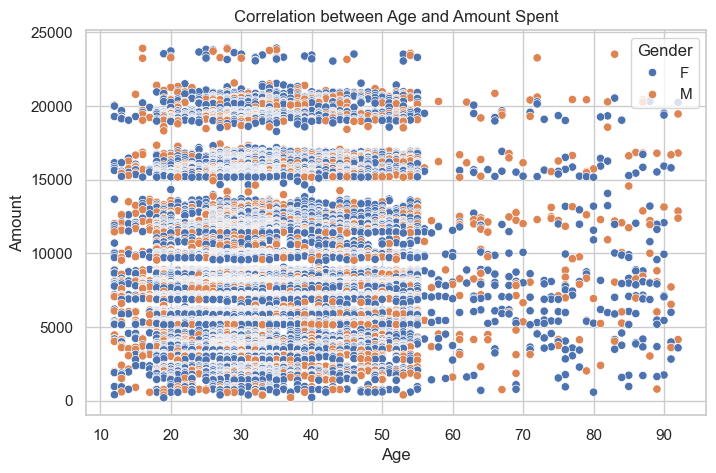

Correlation between Age and Amount: 0.03094133592907657


In [167]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Amount', hue='Gender')
plt.title("Correlation between Age and Amount Spent")
plt.show()

# Correlation coefficient
print("Correlation between Age and Amount:", df['Age'].corr(df['Amount']))